<a href="https://colab.research.google.com/github/ofakduman/Lstm-forecasting/blob/main/lstm_forecasting_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd


In [6]:
df = pd.read_csv("all_data.csv")

### logcs nan olanlari at, record ID tekrarlanmasin
### Food name kolonunu kaldir
### Temperature Nan lari kaldir ve temprature kolonundaki logcs degerleri gibi olan degerleri kaldir deger int e cevriliyorsa kalsin
### Nanlari kaldir Aw deki
### Assumed kolonunu kaldir
### Conditions kolonunu kaldir
### Max.rate(logc.conc / h) kolonunu kaldir

In [ ]:
df['Organism'].unique()
df['Organism'].isna().sum()


In [ ]:
len(df['Food category'].unique())
df['Food category'].isna().sum()


In [ ]:
len(df['Food Name'].unique())
# df['Food Name'].isna().sum()

In [ ]:
df['Temperature (C)'].unique()
# df['Temperature (C)'].isna().sum()

In [12]:
df['Aw'].unique()
df['Aw'].isna().sum()

342

In [15]:
df['pH'].unique()
df['pH'].isna().sum()

49

In [21]:
df['Assumed'].unique()
df['Assumed'].isna().sum()
# df.columns


13342

In [24]:
print(df['Max.rate(logc.conc / h)'].unique())
# df['Max.rate(logc.conc / h)'].isna().sum()


['Fit data' '0.0114' '0.00729' ... '0.0998' '0.219' '0.0939']


In [33]:
df.replace("Not available", pd.NA, inplace=True)
len(df)


24194

In [34]:
df_dropped = df.drop(['Conditions', 'Assumed', 'Max.rate(logc.conc / h)', 'Food Name'], axis=1)
df_dropped.head()
len(df_dropped.dropna())

10078

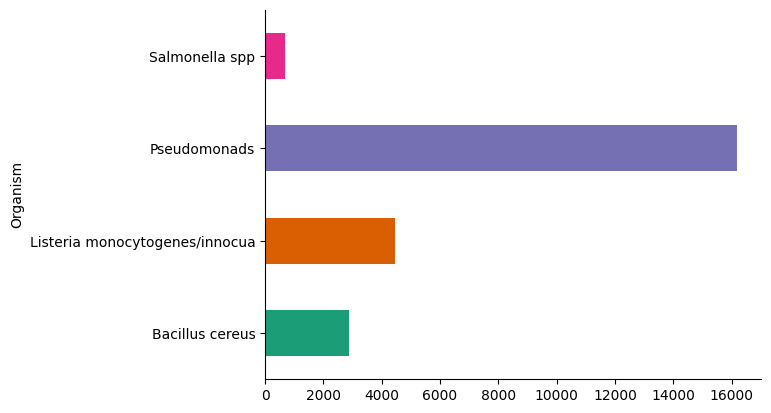

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Organism').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
df_dropped.dropna(inplace=True)

In [52]:
len(df_dropped)
df_dropped


,Record ID,Organism,Food category,Temperature (C),Aw,pH,Logcs
0,O084_1,Listeria monocytogenes/innocua,Bread,15,0.89,5.2,0;5.89;24;5.77;48;4.15;72;4.86;96;5.86;168;5.4...
1,O084_2,Listeria monocytogenes/innocua,Bread,15,0.89,5.2,0;5.89;24;5.34;48;4.46;72;4.73;96;5.54;168;5.3...
2,O084_3,Listeria monocytogenes/innocua,Bread,21,0.89,5.2,0;5.89;24;5.69;48;5.32;72;5.46;96;5.77;168;5.4...
3,O084_4,Listeria monocytogenes/innocua,Bread,21,0.89,5.2,0;4.89;24;5.52;48;5.2;72;5.38;96;5.52;168;5.63...
4,O084_5,Listeria monocytogenes/innocua,Bread,25,0.89,5.2,0;5.89;24;5.76;48;5.34;72;5.36;96;5.43;168;4.9...
...,...,...,...,...,...,...,...
24186,SY110,Pseudomonads,Poultry,7.0,0.99,6,0;0.84;48;1.01;96;1.15;120;1.28;168;1.53;216;1...
24187,SY126,Pseudomonads,Poultry,7.0,0.99,6,0;3.5;48;3.6;96;3.8;120;4.1;168;4.6;216;5.7;26...
24188,SY127,Pseudomonads,Poultry,7.0,0.99,6,0;3.54;48;3.45;96;3.5;168;3.51;264;3.45;312;3....
24189,SY85,Pseudomonads,Poultry,1.0,0.99,6.2,0;1.84;72;3.3;144;4.54;240;6.62;336;7.98;432;8...


In [53]:
cleaned_df = df_dropped.drop_duplicates(subset='Record ID', keep='first')

In [54]:
def analyze_logcs(logcs_str):
    # Değerleri ; ile böl ve float'a çevir
    values = list(map(float, logcs_str.split(';')))

    # Zaman ve populasyon değerlerini ayır
    times = values[::2]
    populations = values[1::2]

    # Populasyon değerlerinin artıp artmadığını kontrol et
    increases = 0
    decreases = 0
    for i in range(1, len(populations)):
        if populations[i] > populations[i-1]:
            increases += 1
        elif populations[i] < populations[i-1]:
            decreases += 1

    # Toplam değer sayısı ve artma/azalma sayılarına göre bir sonuç döndür
    return {
        "total_values": len(populations),
        "increases": increases,
        "decreases": decreases
    }

# `Logcs` kolonunu analiz edelim
cleaned_df_copy = cleaned_df.copy()
results = cleaned_df['Logcs'].apply(analyze_logcs)

# Sonuçları yeni kolonlarda saklayalım
cleaned_df_copy['Total Values'] = results.apply(lambda x: x["total_values"])
cleaned_df_copy['Increases'] = results.apply(lambda x: x["increases"])
cleaned_df_copy['Decreases'] = results.apply(lambda x: x["decreases"])

In [176]:
cleaned_df_copy[cleaned_df_copy["Record ID"] == "Lm_BfG_31"]



,Record ID,Organism,Food category,Temperature (C),Aw,pH,Logcs,Total Values,Increases,Decreases
110,Lm_BfG_31_2,Listeria monocytogenes/innocua,Beef,57.5,0.974,5,0;8.68;0.12;6.93;0.17;6.05;0.25;5.11;0.33;3.74...,9,1,7


In [173]:
a = "0;8.7;0.12;7.88;0.17;6.15;0.25;5.78;0.33;4.97;0.42;3.87;0.5;2.34;0.75;1.69;0.83;1.39"

a.split(";")

['0',
 '8.7',
 '0.12',
 '7.88',
 '0.17',
 '6.15',
 '0.25',
 '5.78',
 '0.33',
 '4.97',
 '0.42',
 '3.87',
 '0.5',
 '2.34',
 '0.75',
 '1.69',
 '0.83',
 '1.39']

In [170]:
import pandas as pd

# Örnek Series verisi
data = {"Logcs": "0;8.7;0.12;7.88;0.17;6.15;0.25;5.78;0.33;4.97;0.42;3.87;0.5;2.34;0.75;1.69;0.83;1.39"}
series = pd.Series(data)

# String'i noktalı virgül ile ayır
values = series['Logcs'].split(';')

# Değerlerin sayısını bul
number_of_points = len(values)

print("Zaman serisindeki nokta sayısı:", number_of_points)


Zaman serisindeki nokta sayısı: 18


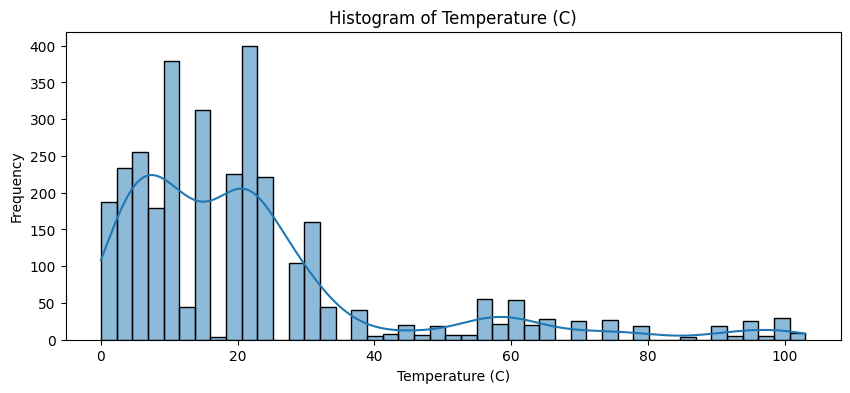


Temperature (C) - Statistical Species:
Min: 0.0
Max: 103.0
Mean: 22.02159850140493
Median: 19.58


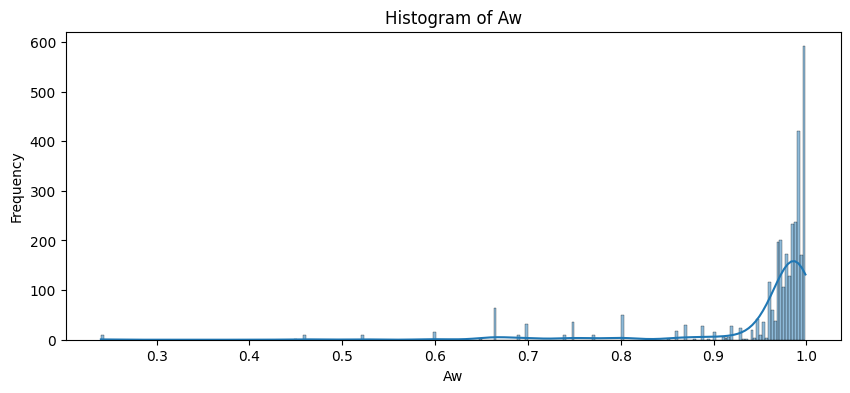


Aw - Statistical Species:
Min: 0.24
Max: 0.999
Mean: 0.955194817358726
Median: 0.986


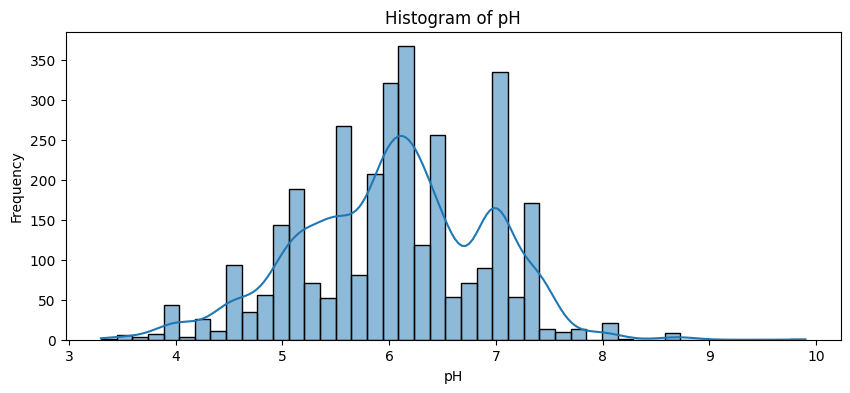


pH - Statistical Species:
Min: 3.3
Max: 9.9
Mean: 6.048773025288792
Median: 6.0


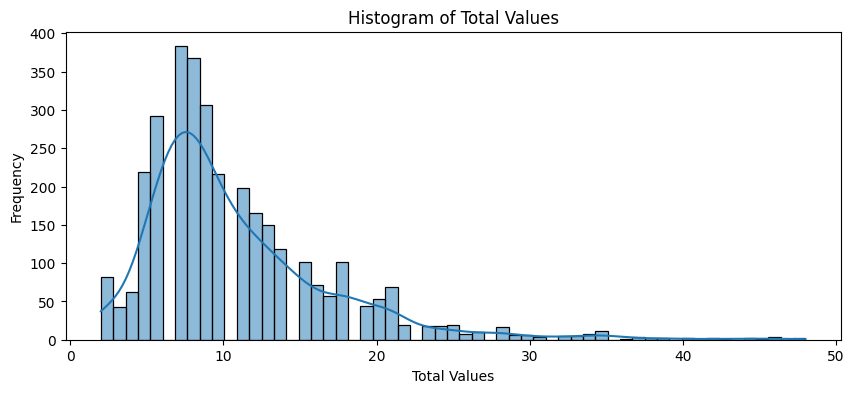


Total Values - Statistical Species:
Min: 2
Max: 48
Mean: 10.848993288590604
Median: 9.0


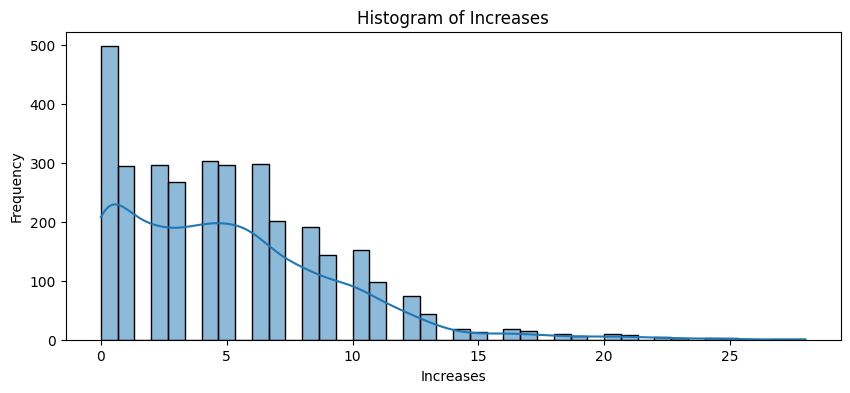


Increases - Statistical Species:
Min: 0
Max: 28
Mean: 5.041488712629652
Median: 4.0


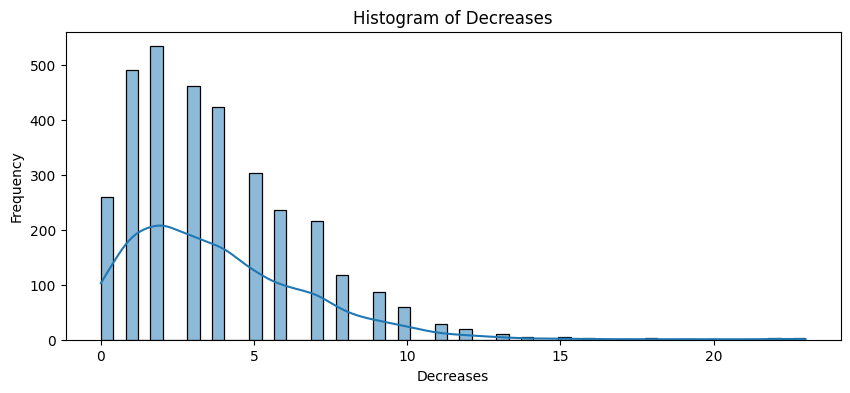


Decreases - Statistical Species:
Min: 0
Max: 23
Mean: 3.8550945698596704
Median: 3.0


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

# Veri setinizi yükleyin
# cleaned_df_copy = pd.read_csv('your_dataset.csv')  # Örnek veri seti yolu
# Sayısal sütunları seçin (örnek olarak sadece sayısal verileri içeren sütunlar listelenmiştir)
numeric_columns = ['Temperature (C)', 'Aw', 'pH', 'Total Values', 'Increases', 'Decreases']
for col in numeric_columns:
    # Sayısal olmayan verileri ve NaN değerleri temizle
    cleaned_data = cleaned_df_copy[col].apply(pd.to_numeric, errors='coerce').dropna()
    squared_data = cleaned_data ** 2

    # Histogramı çiz
    plt.figure(figsize=(10, 4))
    sns.histplot(cleaned_data, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Temel İstatistiksel Özellikler
    print(f"\n{col} - Statistical Species:")
    print(f"Min: {cleaned_data.min()}")
    print(f"Max: {cleaned_data.max()}")
    print(f"Mean: {cleaned_data.mean()}")
    print(f"Median: {cleaned_data.median()}")




In [186]:
cleaned_df_copy[cleaned_df_copy['Record ID'] == 'PS203']

,Record ID,Organism,Food category,Temperature (C),Aw,pH,Logcs,Total Values,Increases,Decreases
8273,PS203,Pseudomonads,Culture medium,15,0.971,6.5,0;3.1;24;2.4;48;5.76;72;6.8;96;7.66;264;7.88;3...,11,6,4


In [187]:
trashold_sample_value = 5
df = cleaned_df_copy[cleaned_df_copy['Total Values'] > trashold_sample_value]
df = df[df['Temperature (C)'].apply(lambda x: ';' not in x)]
df = df[df['pH'].apply(lambda x: ';' not in x)]
df = df[df['Aw'].apply(lambda x: ';' not in x)]
len(df)

2806

In [188]:
def parse_logcs(logcs_str):
    pairs = logcs_str.split(';')
    parsed_pairs = []
    for i in range(0, len(pairs) - 1, 2):
        try:
            # Zaman değerini tam sayıya dönüştür
            time = float(pairs[i])
            # Değer olarak ondalık sayı kullan
            value = float(pairs[i + 1])
            parsed_pairs.append((time, value))
        except ValueError:
            # Geçersiz dönüşüm olduğunda bu çifti atla
            continue
    return parsed_pairs

df['Logcs'] = df['Logcs'].apply(parse_logcs)


In [189]:
df.head()


,Record ID,Organism,Food category,Temperature (C),Aw,pH,Logcs,Total Values,Increases,Decreases
0,O084_1,Listeria monocytogenes/innocua,Bread,15,0.89,5.2,"[(0.0, 5.89), (24.0, 5.77), (48.0, 4.15), (72....",14,5,8
1,O084_2,Listeria monocytogenes/innocua,Bread,15,0.89,5.2,"[(0.0, 5.89), (24.0, 5.34), (48.0, 4.46), (72....",14,4,9
2,O084_3,Listeria monocytogenes/innocua,Bread,21,0.89,5.2,"[(0.0, 5.89), (24.0, 5.69), (48.0, 5.32), (72....",13,3,8
3,O084_4,Listeria monocytogenes/innocua,Bread,21,0.89,5.2,"[(0.0, 4.89), (24.0, 5.52), (48.0, 5.2), (72.0...",12,4,7
4,O084_5,Listeria monocytogenes/innocua,Bread,25,0.89,5.2,"[(0.0, 5.89), (24.0, 5.76), (48.0, 5.34), (72....",10,2,7


In [190]:
original_columns = set(df.columns)

df = pd.get_dummies(df, columns=['Organism', 'Food category'])

df.head()

,Record ID,Temperature (C),Aw,pH,Logcs,Total Values,Increases,Decreases,Organism_Bacillus cereus,Organism_Listeria monocytogenes/innocua,Organism_Pseudomonads,Organism_Salmonella spp,Food category_Beef,Food category_Bread,Food category_Cheese,Food category_Culture medium,Food category_Dessert food,Food category_Egg or egg product,Food category_Infant_food,Food category_Milk,Food category_Other or unknown type of dairy,Food category_Other or unknown type of meat,"Food category_Other, mixed, uncategorised or unknown type of food",Food category_Pork,Food category_Poultry,Food category_Sauce/dressing,Food category_Sausage,Food category_Seafood/fish,Food category_Vegetable or fruit and their products
0,O084_1,15,0.89,5.2,"[(0.0, 5.89), (24.0, 5.77), (48.0, 4.15), (72....",14,5,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,O084_2,15,0.89,5.2,"[(0.0, 5.89), (24.0, 5.34), (48.0, 4.46), (72....",14,4,9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,O084_3,21,0.89,5.2,"[(0.0, 5.89), (24.0, 5.69), (48.0, 5.32), (72....",13,3,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,O084_4,21,0.89,5.2,"[(0.0, 4.89), (24.0, 5.52), (48.0, 5.2), (72.0...",12,4,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,O084_5,25,0.89,5.2,"[(0.0, 5.89), (24.0, 5.76), (48.0, 5.34), (72....",10,2,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd


# Pandas'ın maksimum gösterim sınırlarını ayarlayın
pd.set_option('display.max_rows', 100)  # Satırları sınırsız göster
pd.set_option('display.max_columns', 100)  # Sütunları sınırsız göster

# DataFrame'i göster
df


In [195]:
from sklearn.preprocessing import StandardScaler


features_to_scale = ['Temperature (C)', 'Aw', 'pH']
scaler = StandardScaler()

# Normalizasyonu sadece belirli sütunlara uygula
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [196]:
df[df["Record ID"]=="Lm_BfG_31_1"]

,Record ID,Temperature (C),Aw,pH,Logcs,Total Values,Increases,Decreases,Organism_Bacillus cereus,Organism_Listeria monocytogenes/innocua,Organism_Pseudomonads,Organism_Salmonella spp,Food category_Beef,Food category_Bread,Food category_Cheese,Food category_Culture medium,Food category_Dessert food,Food category_Egg or egg product,Food category_Infant_food,Food category_Milk,Food category_Other or unknown type of dairy,Food category_Other or unknown type of meat,"Food category_Other, mixed, uncategorised or unknown type of food",Food category_Pork,Food category_Poultry,Food category_Sauce/dressing,Food category_Sausage,Food category_Seafood/fish,Food category_Vegetable or fruit and their products
109,Lm_BfG_31_1,1.930165,0.141802,-1.236324,"[(0.0, 8.7), (0.12, 7.88), (0.17, 6.15), (0.25...",9,0,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
import pandas as pd
import numpy as np


# Hariç tutulacak sütunlar
exclude_columns = ['Record ID','Total Values', 'Increases', 'Decreases','Logcs']

# all_features listesini oluşturma
all_features = [col for col in df.columns if col not in exclude_columns]

# Veriyi hazırlama
X = []  # Girdiler
y = []  # Hedefler

for index, row in df.iterrows():
    logcs_data = row['Logcs']
    # Tüm uygun özellikleri al
    features = row[all_features].values
    for i in range(len(logcs_data)-1):
        X.append(np.concatenate(([logcs_data[i][1]], features)))  # current value and other features
        y.append(logcs_data[i+1][1])  # next value

X = np.array(X).reshape(-1, 1, len(X[0]))  # (samples, time steps, features)
y = np.array(y).reshape(-1, 1)


Epoch 1/50
763/763 [==============================] - 12s 9ms/step - loss: 2.7743 - val_loss: 1.0066
Epoch 2/50
763/763 [==============================] - 4s 5ms/step - loss: 1.0054 - val_loss: 0.9807
Epoch 3/50
763/763 [==============================] - 4s 6ms/step - loss: 0.9876 - val_loss: 0.9609
Epoch 4/50
763/763 [==============================] - 5s 7ms/step - loss: 0.9788 - val_loss: 0.9723
Epoch 5/50
763/763 [==============================] - 4s 6ms/step - loss: 0.9735 - val_loss: 0.9502
Epoch 6/50
763/763 [==============================] - 4s 5ms/step - loss: 0.9676 - val_loss: 0.9559
Epoch 7/50
763/763 [==============================] - 5s 7ms/step - loss: 0.9611 - val_loss: 0.9611
Epoch 8/50
763/763 [==============================] - 4s 6ms/step - loss: 0.9614 - val_loss: 0.9618
Epoch 9/50
763/763 [==============================] - 5s 6ms/step - loss: 0.9557 - val_loss: 0.9400
Epoch 10/50
763/763 [==============================] - 5s 6ms/step - loss: 0.9543 - val_loss: 0.933

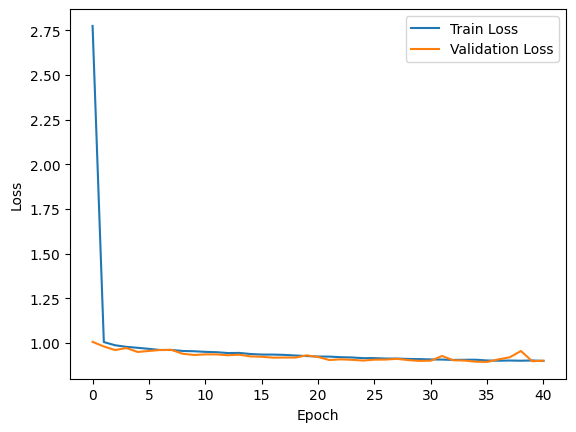

In [211]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Verilerinizi yükleyin veya oluşturun
# X ve y verilerini bu aşamada hazırlayın

# Verileri eğitim ve test kümesine bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# LSTM modeli oluşturun
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dense(1))  # Çıkış katmanı

# Modeli derleyin
model.compile(optimizer='adam', loss='mean_squared_error')  # İstediğiniz bir optimizasyon ve loss fonksiyonu kullanabilirsiniz

# Early Stopping callback'i oluşturun
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Modeli eğitin ve Early Stopping callback'ini kullanın
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Modelin performansını değerlendirin
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Tahminler yapın
predictions = model.predict(X_test)

# Eğitim ve doğrulama kayıplarını görselleştirin
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


191/191 [==============================] - 1s 4ms/step


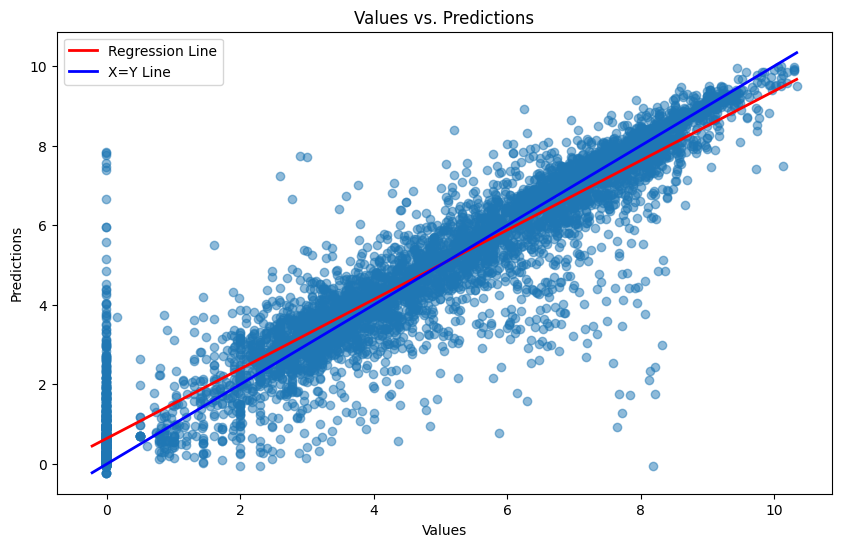

In [212]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Tahminleri ve gerçek değerleri alın
predictions = model.predict(X_test)

# Linear Regression modelini oluşturun ve eğitin
regression_model = LinearRegression()
y_test = y_test.reshape(-1, 1)  # Yeniden şekillendirme
predictions = predictions.reshape(-1, 1)  # Yeniden şekillendirme
regression_model.fit(y_test, predictions)

# Gerçek değerlerin minimum ve maksimum değerlerini alın
min_val = min(np.min(y_test), np.min(predictions))
max_val = max(np.max(y_test), np.max(predictions))

# Doğruyu çizmek için tahminler oluşturun
x_values = np.linspace(min_val, max_val, 100)
y_values = regression_model.predict(x_values.reshape(-1, 1))

# Scatter plot oluşturun
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression Line')

# X=Y doğrusunu çizmek için
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linewidth=2, label='X=Y Line')

plt.xlabel('Values')
plt.ylabel('Predictions')
plt.title('Values vs. Predictions')
plt.legend()
plt.show()


In [215]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
# Tahminlerin boyutunu kontrol edin ve düzeltin
predictions = np.squeeze(predictions)

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# Kök Ortalama Karesel Hata (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# R² Skoru
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 0.590
Root Mean Squared Error (RMSE): 0.946
R² Score: 0.870


In [221]:
len(df)
df.head(1)

,Record ID,Temperature (C),Aw,pH,Logcs,Total Values,Increases,Decreases,Organism_Bacillus cereus,Organism_Listeria monocytogenes/innocua,Organism_Pseudomonads,Organism_Salmonella spp,Food category_Beef,Food category_Bread,Food category_Cheese,Food category_Culture medium,Food category_Dessert food,Food category_Egg or egg product,Food category_Infant_food,Food category_Milk,Food category_Other or unknown type of dairy,Food category_Other or unknown type of meat,"Food category_Other, mixed, uncategorised or unknown type of food",Food category_Pork,Food category_Poultry,Food category_Sauce/dressing,Food category_Sausage,Food category_Seafood/fish,Food category_Vegetable or fruit and their products
0,O084_1,-0.272966,-0.881194,-1.004134,"[(0.0, 5.89), (24.0, 5.77), (48.0, 4.15), (72....",14,5,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


['Temperature (C)',
 'Aw',
 'pH',
 'Organism_Bacillus cereus',
 'Organism_Listeria monocytogenes/innocua',
 'Organism_Pseudomonads',
 'Organism_Salmonella spp',
 'Food category_Beef',
 'Food category_Bread',
 'Food category_Cheese',
 'Food category_Culture medium',
 'Food category_Dessert food',
 'Food category_Egg or egg product',
 'Food category_Infant_food',
 'Food category_Milk',
 'Food category_Other or unknown type of dairy',
 'Food category_Other or unknown type of meat',
 'Food category_Other, mixed, uncategorised or unknown type of food',
 'Food category_Pork',
 'Food category_Poultry',
 'Food category_Sauce/dressing',
 'Food category_Sausage',
 'Food category_Seafood/fish',
 'Food category_Vegetable or fruit and their products']

In [224]:
from sklearn.model_selection import train_test_split

# df DataFrame'ini ilk olarak eğitim ve test setlerine ayır
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# df_train DataFrame'ini daha sonra eğitim ve doğrulama setlerine ayır
df_train_partial, df_val = train_test_split(df_train, test_size=0.2, random_state=42)


In [226]:
df.head(1)

,Record ID,Temperature (C),Aw,pH,Logcs,Total Values,Increases,Decreases,Organism_Bacillus cereus,Organism_Listeria monocytogenes/innocua,Organism_Pseudomonads,Organism_Salmonella spp,Food category_Beef,Food category_Bread,Food category_Cheese,Food category_Culture medium,Food category_Dessert food,Food category_Egg or egg product,Food category_Infant_food,Food category_Milk,Food category_Other or unknown type of dairy,Food category_Other or unknown type of meat,"Food category_Other, mixed, uncategorised or unknown type of food",Food category_Pork,Food category_Poultry,Food category_Sauce/dressing,Food category_Sausage,Food category_Seafood/fish,Food category_Vegetable or fruit and their products
0,O084_1,-0.272966,-0.881194,-1.004134,"[(0.0, 5.89), (24.0, 5.77), (48.0, 4.15), (72....",14,5,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [227]:

def prepare_data(df):
  X, y = [], []
  exclude_columns = ['Record ID','Total Values', 'Increases', 'Decreases','Logcs']

  # all_features listesini oluşturma
  all_features = [col for col in df.columns if col not in exclude_columns]
  all_features


  for index, row in df.iterrows():
      logcs_data = row['Logcs']
      # all_features kullanarak özellikleri seç
      features = row[all_features].values

      if len(logcs_data) > 5:
          X_input = []
          for i in range(5):
              X_input.extend([logcs_data[i][1]])
              X_input.extend(features)

          y_output = [logcs_data[i][1] for i in range(5, len(logcs_data))]

          X.append(X_input)
          y.append(y_output)

  return np.array(X).reshape(-1, 5, len(X[0]) // 5), np.array(y, dtype=object)

# Modelin geri kalan kısmı aynı kalabilir
X_train, y_train = prepare_data(df_train_partial)
X_val, y_val = prepare_data(df_val)
X_test, y_test = prepare_data(df_test)


In [228]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed

# Maksimum çıktı uzunluğunu hesapla
max_output_length = max(len(y) for y in y_train)

# Encoder
encoder_inputs = Input(shape=(5, len(X_train[0][0])))  # 5 zaman adımı, özellik sayısı
encoder_lstm = LSTM(50, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = RepeatVector(max_output_length)(encoder_outputs)  # Burada encoder çıktısını tekrarla
decoder_lstm = LSTM(50, return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = TimeDistributed(Dense(1))  # Her zaman adımı için bir tahmin
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = Model(encoder_inputs, decoder_outputs)

# Model Derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Özeti
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 25)]              0         []                            
                                                                                                  
 lstm_2 (LSTM)               [(None, 50),                 15200     ['input_1[0][0]']             
                              (None, 50),                                                         
                              (None, 50)]                                                         
                                                                                                  
 repeat_vector (RepeatVecto  (None, 43, 50)               0         ['lstm_2[0][0]']              
 r)                                                                                           

Epoch 1/10
1/1 [==============================] - 0s 28ms/step
Training Loss: 2.267159599913496, Validation Loss: 2.2994039640335076
Epoch 2/10
1/1 [==============================] - 0s 36ms/step
Training Loss: 2.0813273535612917, Validation Loss: 2.195362900724201
Epoch 3/10
1/1 [==============================] - 0s 27ms/step
Training Loss: 1.9688483886686066, Validation Loss: 2.10697849246646
Epoch 4/10
1/1 [==============================] - 0s 28ms/step
Training Loss: 1.8763727610017908, Validation Loss: 2.072323445250211
Epoch 5/10
1/1 [==============================] - 0s 24ms/step
Training Loss: 1.7925277835126785, Validation Loss: 2.060791789637741
Epoch 6/10
1/1 [==============================] - 0s 24ms/step
Training Loss: 1.7178235648022862, Validation Loss: 2.057697783197446
Epoch 7/10
1/1 [==============================] - 0s 27ms/step
Training Loss: 1.6435982616038753, Validation Loss: 2.0304839685200022
Epoch 8/10
1/1 [==============================] - 0s 34ms/step
Traini

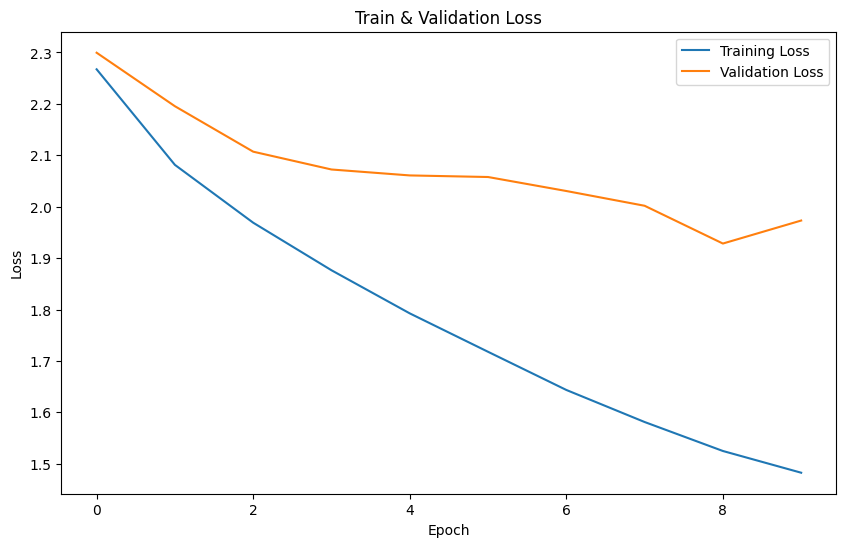

In [230]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.MeanSquaredError()

epochs = 10  # Toplam epoch sayısı
train_losses = []
val_losses = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    total_train_loss = 0
    total_val_loss = 0

    # Eğitim döngüsü
    for i in range(len(X_train)):
        with tf.GradientTape() as tape:
            y_pred = model(X_train[i:i+1], training=True)
            train_loss = loss_fn(y_train[i], y_pred[0, :len(y_train[i]), 0])
        gradients = tape.gradient(train_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        total_train_loss += train_loss.numpy()

    # Doğrulama döngüsü
    for i in range(len(X_val)):
        # X_val[i:i+1] dizisini tensöre dönüştür
        X_val_tensor = tf.convert_to_tensor(X_val[i:i+1], dtype=tf.float32)
        y_pred_val = model.predict(X_val_tensor)

        # y_val[i] dizisini tensöre dönüştür
        y_val_tensor = tf.convert_to_tensor(y_val[i], dtype=tf.float32)

        # Tahmin ve gerçek değerlerin boyutlarını eşitle
        min_length = min(y_pred_val.shape[1], len(y_val[i]))
        val_loss = loss_fn(y_val_tensor[:min_length], y_pred_val[0, :min_length, 0])

        total_val_loss += val_loss.numpy()

    # Ortalama kayıpları hesapla ve kaydet
    avg_train_loss = total_train_loss / len(X_train)
    avg_val_loss = total_val_loss / len(X_val)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Training Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}")

# Kayıpları grafik üzerinde görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [231]:
# Test veri seti üzerinde tahmin yapma
y_pred = model.predict(X_test)


18/18 [==============================] - 0s 9ms/step


In [233]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
def calculate_metrics(y_true, y_pred):
    mse_values = []
    mae_values = []
    r2_values = []

    for i in range(len(y_true)):
        true_values = np.array(y_true[i])
        pred_values = y_pred[i, :len(y_true[i]), 0]

        mse = mean_squared_error(true_values, pred_values)
        mae = mean_absolute_error(true_values, pred_values)

        mse_values.append(mse)
        mae_values.append(mae)

        # R2 skorunu yalnızca birden fazla değeri olan örnekler için hesap
        if len(true_values) > 1:
            r2 = r2_score(true_values, pred_values)
            r2_values.append(r2)

    return np.mean(mse_values), np.mean(mae_values), np.mean(r2_values) if r2_values else np.nan

# Hata metriklerini hesaplama
mse, mae, r2 = calculate_metrics(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 1.6406385163167228
Mean Absolute Error: 0.8528086853381791
R2 Score: -5.95903374966504e+33


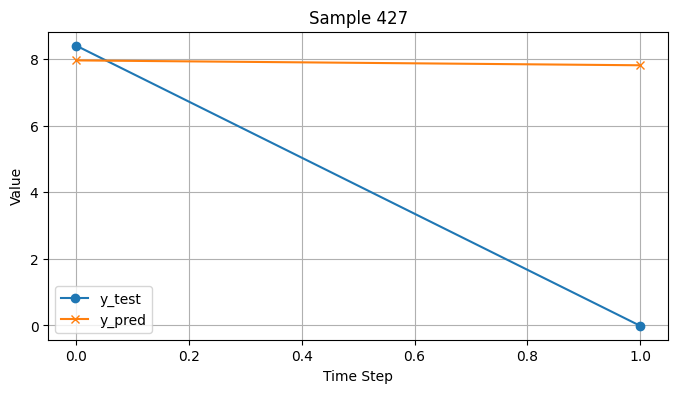

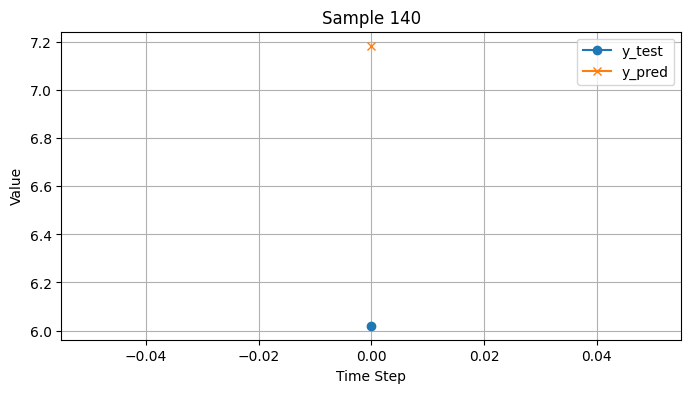

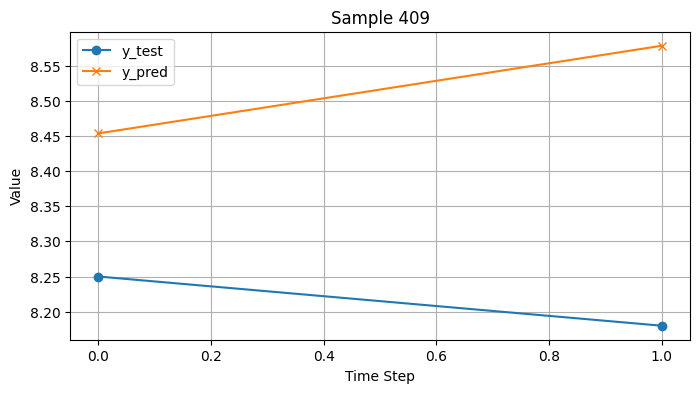

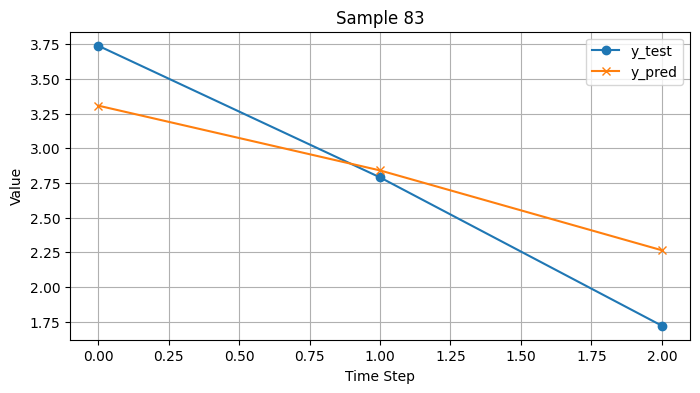

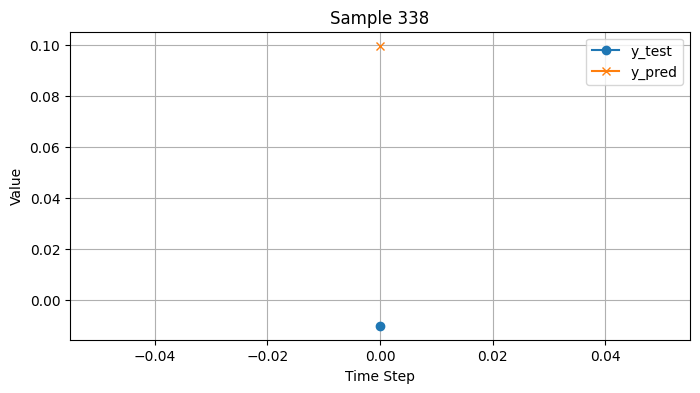

In [236]:
import matplotlib.pyplot as plt
import random

selected_indices = random.sample(range(len(y_test)), 5)

for index in selected_indices:
    plt.figure(figsize=(8, 4))  # Grafik boyutu
    plt.plot(y_test[index], marker='o', label='y_test')

    # y_pred verisini y_test verisinin uzunluğu
    y_pred_trimmed = y_pred[index][:len(y_test[index])]
    plt.plot(y_pred_trimmed, marker='x', label='y_pred')

    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.title(f'Sample {index + 1}')
    plt.show()

In [237]:
df

,Record ID,Temperature (C),Aw,pH,Logcs,Total Values,Increases,Decreases,Organism_Bacillus cereus,Organism_Listeria monocytogenes/innocua,Organism_Pseudomonads,Organism_Salmonella spp,Food category_Beef,Food category_Bread,Food category_Cheese,Food category_Culture medium,Food category_Dessert food,Food category_Egg or egg product,Food category_Infant_food,Food category_Milk,Food category_Other or unknown type of dairy,Food category_Other or unknown type of meat,"Food category_Other, mixed, uncategorised or unknown type of food",Food category_Pork,Food category_Poultry,Food category_Sauce/dressing,Food category_Sausage,Food category_Seafood/fish,Food category_Vegetable or fruit and their products
0,O084_1,-0.272966,-0.881194,-1.004134,"[(0.0, 5.89), (24.0, 5.77), (48.0, 4.15), (72....",14,5,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,O084_2,-0.272966,-0.881194,-1.004134,"[(0.0, 5.89), (24.0, 5.34), (48.0, 4.46), (72....",14,4,9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,O084_3,0.038064,-0.881194,-1.004134,"[(0.0, 5.89), (24.0, 5.69), (48.0, 5.32), (72....",13,3,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,O084_4,0.038064,-0.881194,-1.004134,"[(0.0, 4.89), (24.0, 5.52), (48.0, 5.2), (72.0...",12,4,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,O084_5,0.245418,-0.881194,-1.004134,"[(0.0, 5.89), (24.0, 5.76), (48.0, 5.34), (72....",10,2,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24186,SY110,-0.687673,0.336659,-0.075375,"[(0.0, 0.84), (48.0, 1.01), (96.0, 1.15), (120...",14,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
24187,SY126,-0.687673,0.336659,-0.075375,"[(0.0, 3.5), (48.0, 3.6), (96.0, 3.8), (120.0,...",11,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
24188,SY127,-0.687673,0.336659,-0.075375,"[(0.0, 3.54), (48.0, 3.45), (96.0, 3.5), (168....",14,8,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
24189,SY85,-0.998703,0.336659,0.156815,"[(0.0, 1.84), (72.0, 3.3), (144.0, 4.54), (240...",10,7,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
